merg Importance List
merg 
                              importance
Features                               
Bwd Packet Length Std          0.246598
Flow Bytes/s                   0.178725
Total Length of Fwd Packets    0.111345
Fwd Packet Length Std          0.063859
Flow IAT Std                   0.009803
Flow IAT Min                   0.006936
Fwd IAT Total                  0.005133
Flow Duration                  0.004065
Bwd Packet Length Max          0.003980
Flow IAT Max                   0.003615
Flow IAT Mean                  0.003232
Total Length of Bwd Packets    0.001593
Fwd Packet Length Min          0.000672
Bwd Packet Length Mean         0.000553
Flow Packets/s                 0.000535
Fwd Packet Length Mean         0.000498
Total Backward Packets         0.000166
Fwd Packet Length Max          0.000134
Total Fwd Packets              0.000113
Bwd Packet Length Min          0.000083 


merg=["Bwd Packet Length Std","Flow Bytes/s","Total Length of Fwd Packets","Fwd Packet Le

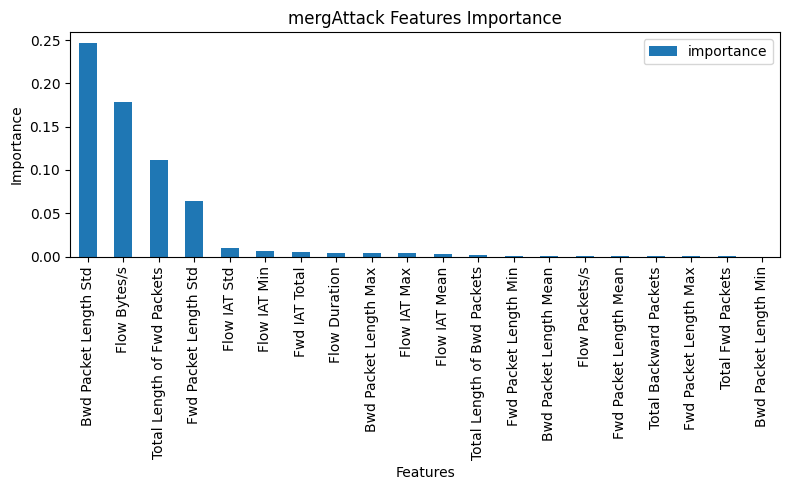




Time taken:  10301.437170267105


In [1]:
#Calculating importance of features of merged data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier
import os
import time

start_time=time.time()

def create_folder(f_name):
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print("Couldn't make folder")

csv_files=["merged.csv"]

main_labels=["Flow Duration","Total Fwd Packets",   "Total Backward Packets","Total Length of Fwd Packets","Total Length of Bwd Packets","Fwd Packet Length Max","Fwd Packet Length Min",
   "Fwd Packet Length Mean","Fwd Packet Length Std","Bwd Packet Length Max","Bwd Packet Length Min","Bwd Packet Length Mean","Bwd Packet Length Std",
   "Flow Bytes/s","Flow Packets/s","Flow IAT Mean","Flow IAT Std","Flow IAT Max","Flow IAT Min","Fwd IAT Total","Fwd IAT Mean","Fwd IAT Std","Fwd IAT Max",
   "Fwd IAT Min","Bwd IAT Total","Bwd IAT Mean","Bwd IAT Std","Bwd IAT Max","Bwd IAT Min","Fwd PSH Flags","Bwd PSH Flags","Fwd URG Flags","Bwd URG Flags",
   "Fwd Header Length","Bwd Header Length","Fwd Packets/s","Bwd Packets/s","Min Packet Length","Max Packet Length","Packet Length Mean","Packet Length Std",
   "Packet Length Variance","FIN Flag Count","SYN Flag Count","RST Flag Count","PSH Flag Count","ACK Flag Count","URG Flag Count","CWE Flag Count",
   "ECE Flag Count","Down/Up Ratio","Average Packet Size","Avg Fwd Segment Size","Avg Bwd Segment Size","Fwd Avg Bytes/Bulk",
   "Fwd Avg Packets/Bulk","Fwd Avg Bulk Rate","Bwd Avg Bytes/Bulk","Bwd Avg Packets/Bulk","Bwd Avg Bulk Rate","Subflow Fwd Packets","Subflow Fwd Bytes",
   "Subflow Bwd Packets","Subflow Bwd Bytes","Init_Win_bytes_forward","Init_Win_bytes_backward","act_data_pkt_fwd",
   "min_seg_size_forward","Active Mean","Active Std","Active Max","Active Min",
    "Idle Mean","Idle Std","Idle Max", "Idle Min","Label"]

obj= open("imp_features_merged.csv","w")
create_folder("feature_merged")

for i in csv_files:
    df=pd.read_csv(i, usecols=main_labels)
    df=df.fillna(0)
    attack_class=[]
    for j in df["Label"]:   #Labelling attack as 0 and normal(benign) as 1
        if j== "BENIGN":
            attack_class.append(1)
        else:
            attack_class.append(0)
    df["Label"]=attack_class
    
    y=df["Label"].values
    del df["Label"]
    x=df.values

    x = np.float32(x)
    x[np.isnan(x)] = 0
    x[np.isinf(x)] = 0

    #computing importance of features with feature_importance_
    rfr=sk.ensemble.RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=-1)
    rfr.fit(x,y)
    imp=rfr.feature_importances_
    std = np.std([tree.feature_importances_ for tree in rfr.estimators_], axis=0)
    indices = np.argsort(imp)[::-1]
    refclasscol= list(df.columns.values)
    imp_bars= pd.DataFrame({'Features':refclasscol[0:20],'importance':imp[0:20]}) #top 20 features
    imp_bars= imp_bars.sort_values(by='importance', ascending=False).set_index('Features')
    plt.rcParams['figure.figsize'] = (8,5)
    imp_bars.plot.bar();

    #Plotting importance of features
    count=0
    feature=i[0:4]+"=["
    for j in imp_bars.index:
        feature = feature+ "\""+ str(j) + "\","
        count+=1
        if count ==5:
            feature=feature[:-1] + "]"
            break
    print(i[0:4], "Importance List")
    print(i[0:4], "\n", imp_bars.head(20), "\n\n")
    print(feature)
    plt.title(i[0:4] + "Attack Features Importance")
    plt.ylabel("Importance")
    plt.savefig("./feature_attack/"+i[0:4]+".pdf", bbox_inches='tight', format='pdf')
    obj.write((feature))
    plt.tight_layout()
    plt.show()
    print("\n\n")

print("Time taken: ",time.time()-start_time)
obj.close()